In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
forest = pd.read_csv(r"D:\DS\17. Support Vector Machines\forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


<AxesSubplot:>

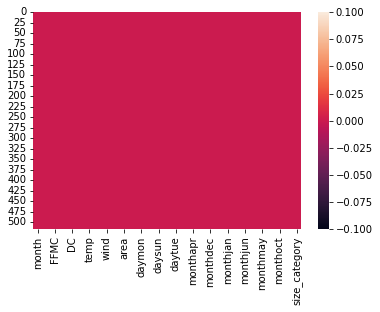

In [3]:
sns.heatmap(forest.isnull())


<AxesSubplot:xlabel='month'>

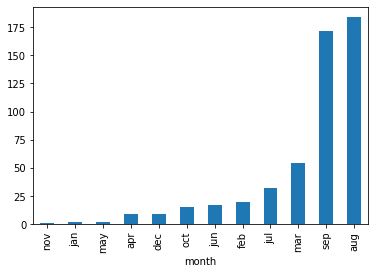

In [4]:
forest.value_counts('month').sort_values().plot(kind='bar')


<AxesSubplot:xlabel='FFMC', ylabel='Density'>

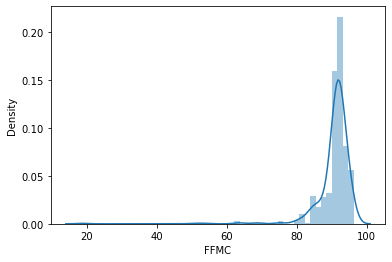

In [5]:
sns.distplot(forest['FFMC'])


<AxesSubplot:>

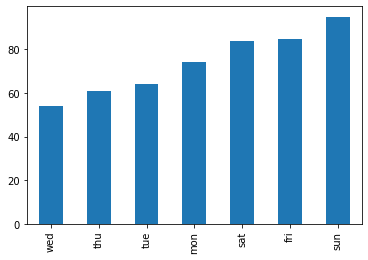

In [6]:
forest.day.value_counts().sort_values().plot(kind='bar')


In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [8]:
forest['y']=lb.fit_transform(forest['size_category'])


In [9]:
forest.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,y
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


In [10]:
forest=forest.drop(['month','day','size_category'],axis=1)


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x=forest.drop('y',axis=1)
y=forest['y']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=101)

In [13]:
from sklearn.svm import SVC


In [14]:
svm = SVC()


In [15]:
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)
print(f"Training AC: {svm.score(xtrain, ytrain)}\nTesting AC: {svm.score(xtest, ytest)}")


Training AC: 0.7658959537572254
Testing AC: 0.7251461988304093


# Hyperparameter Tuining


In [16]:
from sklearn.model_selection import GridSearchCV


In [17]:
params = {
    'C' : [0.001, 0.01, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : [0.001, 0.01, 1, 10] }


In [18]:
grid = GridSearchCV(SVC(), param_grid=params)


In [19]:
grid.fit(xtrain, ytrain)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'gamma': [0.001, 0.01, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [20]:
grid.best_estimator_


SVC(C=1, gamma=0.001, kernel='linear')

In [21]:
grid.best_score_


0.9855486542443064

In [22]:
svm = SVC(C=1, gamma=0.001, kernel='linear')
svm.fit(xtrain,ytrain)
pred = svm.predict(xtest)
print(f"Training AC: {svm.score(xtrain, ytrain)}\nTesting AC: {svm.score(xtest, ytest)}")


Training AC: 1.0
Testing AC: 0.9824561403508771
